# Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialgraphs2016/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Sunday September 25th at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/.

# Part One: Network Models

## Watts-Strogatz Networks

* Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity _p_ = 0, 0.1, and 1\. Calculate the average shortest path length < _d_ \> for each one. Describe what happens to the network when _p_ = 1\.
* Let's understand the behavior of the WS model as we increase _p_ in more detail. Generate 50 networks with _N_ = 500, < _k_ \> = 4, for each of _p_ = {0, 0.01, 0.03, 0.05, 0.1, 0.2}. Calculate the average of < _d_ \> as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](http://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html "Link: http://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html") to the plot. My version of the plot is below (since a picture's worth 1000 words).

![Sune's version](https://dl.dropboxusercontent.com/u/153071/02805/ws.png)

In [103]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random as rn
%matplotlib inline

In [104]:
G1=nx.watts_strogatz_graph(500,4,0)
G2=nx.watts_strogatz_graph(500,4,0.1)
G3=nx.watts_strogatz_graph(500,4,1)

ShortestPath1=nx.average_shortest_path_length(G1)
ShortestPath2=nx.average_shortest_path_length(G2)
ShortestPath3=nx.average_shortest_path_length(G3)

print ShortestPath1
print ShortestPath2
print ShortestPath3

62.875751503
7.66452905812
4.77003607214


It is the shortest path ~ 5 when the rewiring parameter p is 1 it means also that netwrok is more similar to one big cluster.

Value of p=0.00 , value of shortest path is 62.87575150.
Value of p=0.02 , value of shortest path is 15.20961924.
Value of p=0.04 , value of shortest path is 11.91088577.
Value of p=0.06 , value of shortest path is 10.08095391.
Value of p=0.08 , value of shortest path is 8.29751503.
Value of p=0.10 , value of shortest path is 7.71674549.
Value of p=0.12 , value of shortest path is 7.18210020.
Value of p=0.14 , value of shortest path is 6.99250501.
Value of p=0.16 , value of shortest path is 6.78521844.
Value of p=0.18 , value of shortest path is 6.27168737.
Value of p=0.20 , value of shortest path is 6.11478156.
Value of p=0.22 , value of shortest path is 5.93317836.
Value of p=0.24 , value of shortest path is 5.82565932.
Value of p=0.26 , value of shortest path is 5.74133066.
Value of p=0.28 , value of shortest path is 5.50346293.
Value of p=0.30 , value of shortest path is 5.48373547.
Value of p=0.32 , value of shortest path is 5.32102605.
Value of p=0.34 , value of shortest path is 

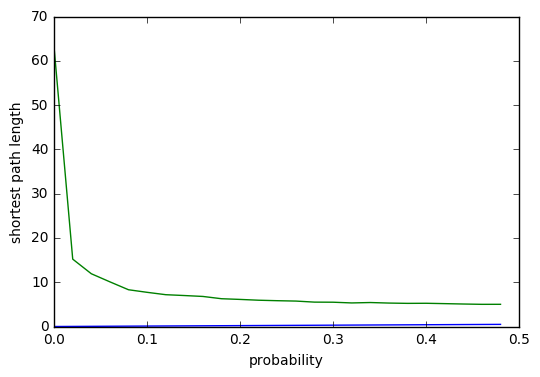

In [163]:
nrange=np.arange(0,0.5,0.02)
Shortest=[]
for i in nrange:
    Graph=nx.watts_strogatz_graph(500,4,i)
    GraphPath=nx.average_shortest_path_length(Graph)
    Shortest.append([i,GraphPath])
    print "Value of p=%1.2f , value of shortest path is %5.8f." %(i, GraphPath)
plt.ylabel("shortest path length")
plt.xlabel("probability")
plt.plot(nrange, Shortest)

When p is more than 0.1 the shortest path is getting significantly smaller but when the value of p=0.3 the shortest path is getting very close to 
fully randomized network   

In [109]:
p=[0,0.01,0.03,0.05,0.1,0.2]
k=4
N=500
STD=[]
average=[]
for i in p:
    STDin=[]
    for it in range(1,50):
        G=nx.watts_strogatz_graph(N,k,i)
        SD=nx.average_shortest_path_length(G)
        STDin.append(SD)
    average.append(np.mean(STDin))
    STD.append(np.std(STDin))
plotRange = np.array(p)
plotMean = np.array(average)
PlotSTD = np.array(STD)

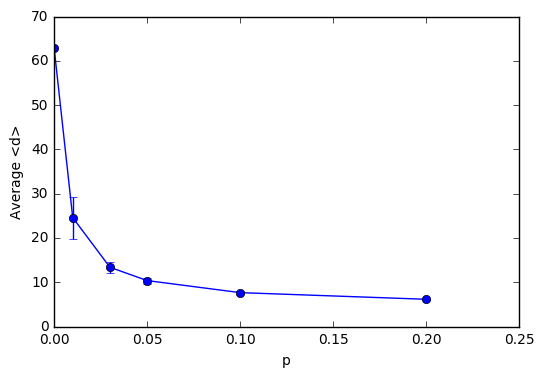

In [110]:
plt.figure()
plt.errorbar(plotRange,plotMean,PlotSTD, marker="o")
plt.ylabel('Average <d>')
plt.xlabel('p')

## The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success

* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.
* Now create a 5000 node network.
  * What's the maximum and minimum degree?
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.

![Sune's version](https://dl.dropboxusercontent.com/u/153071/02805/ba.png)

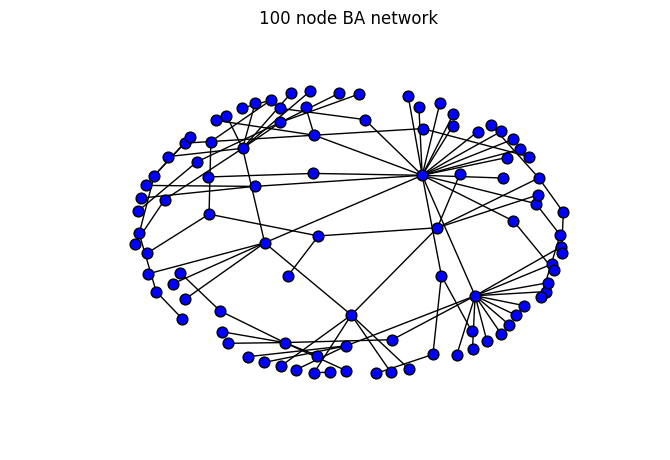

In [168]:
#First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).
import random 
import math

G = nx.Graph()
G.add_edge(1,2)
i = 3

#Now add another node, connecting one of the existing nodes in proportion to their degree.
#Keep going until you have a 100 node network.
z=[]
for l in range(100 - len(G)):
    z = [ x for (x,y) in G.edges() ]
    z.extend([ y for (x,y) in G.edges() ])
    G.add_edge(i,random.choice(z))
    i += 1
    
#Plot the network
nx.draw(G, node_size = 60, node_color = "Blue" )
plt.title("100 node BA network")
plt.show()

In [118]:
#Add more nodes until you have a 5000 node network.
for l in range(5000 - len(G)):
    z = [ x for (x,y) in G.edges() ]
    z.extend([ y for (x,y) in G.edges() ])
    G.add_edge(i,random.choice(z))
    i += 1

In [119]:
#What's the maximum and minimum degree?
maxd = max(G.degree().values())
mind = min(G.degree().values())
print "Max %d" % maxd
print "Min %d" % mind

Max 220
Min 1


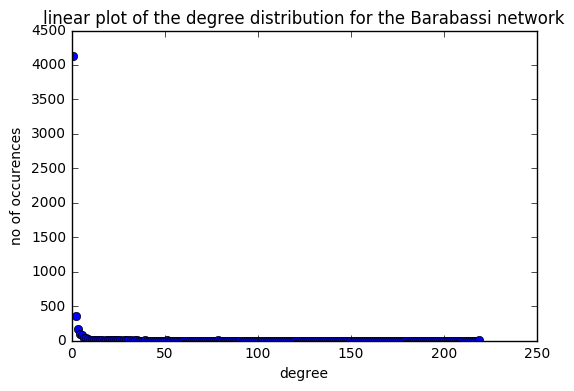

In [167]:
#Plot the distribution. Plot it with both linear and log-log axes.
h, b = np.histogram(G.degree().values(), bins=200)

#Linear Scale
#plt.subplot(221)
plt.title("linear plot of the degree distribution for the Barabassi network")
plt.xlabel("degree")
plt.ylabel("no of occurences")
plt.plot(b[0:-1], h, 'bo')

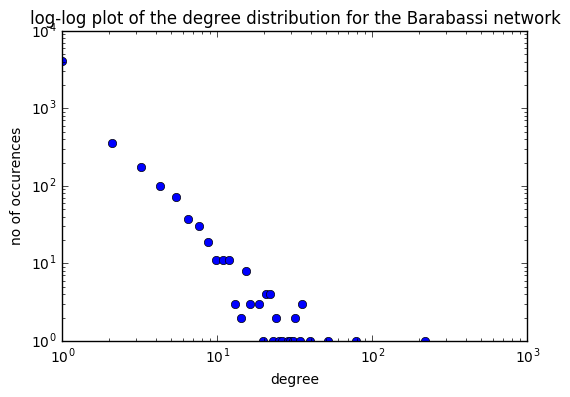

In [166]:
#Logaritmic Scale
#plt.subplot(222) 
plt.title("log-log plot of the degree distribution for the Barabassi network")
plt.xlabel("degree")
plt.ylabel("no of occurences")
plt.loglog(b[0:-1],h,'bo')

## Power-laws and the friendship paradox

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

* Pick a node _i_ at random (e.g. use `random.choice`). [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).
* Find _i_'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.
* Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.
* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

In [139]:
#Pick a node ii at random (e.g. use random.choice). Find its degree.
first_node =  random.choice(G.nodes()) 
first_node_degree = G.degree(first_node)
print "First node =", first_node
print "First node degree =", first_node_degree

First node = 1208
First node degree = 1


In [140]:
#Find ii's neighbors. And calculate their average degree.
nghb = G.neighbors(first_node)
nghb_degree =[]
for i in nghb:
    node_degree = G.degree(i)
    nghb_degree.append(node_degree)
print "List of neighbors =", nghb
print "List of neighbors degree =", nghb_degree

List of neighbors = [160]
List of neighbors degree = [12]


In [141]:
#Compare the two numbers to check if it's true that ii's friends (on average) have more friends than ii.
avg_nghb_degree = sum(nghb_degree)/len(nghb_degree)
if avg_nghb_degree > first_node_degree:
    x = "fullfilled"
else:
    x = "not fullfiled"
print "Friendship paradox is", x

Friendship paradox is fullfilled


In [142]:
#Do this 1000 times. How many out of those 1000 times is the friendship paradox true?
t=0
f=0
for i in range(1000):
    first_node =  random.choice(G.nodes()) 
    first_node_degree = G.degree(first_node)
    i+=1
    nghb = G.neighbors(first_node)
    nghb_degree =[]
    for ii in nghb:
        node_degree = G.degree(ii)
        nghb_degree.append(node_degree)
        avg_nghb_degree = sum(nghb_degree)/len(nghb_degree)
    if avg_nghb_degree > first_node_degree:
        t+=1
    else:
        f+=1
print "For 1000 tries friendship paradox was fullfilled %d times" %t

For 1000 tries friendship paradox was fullfilled 854 times


## Growth without preferential attachment

Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. 

Compare the network you've just built to the ER network of same size and same _p_. What are the differences? Explain in your own words. _Hint_: To get started, take a look at the degree distribution, and study the number of connected components.

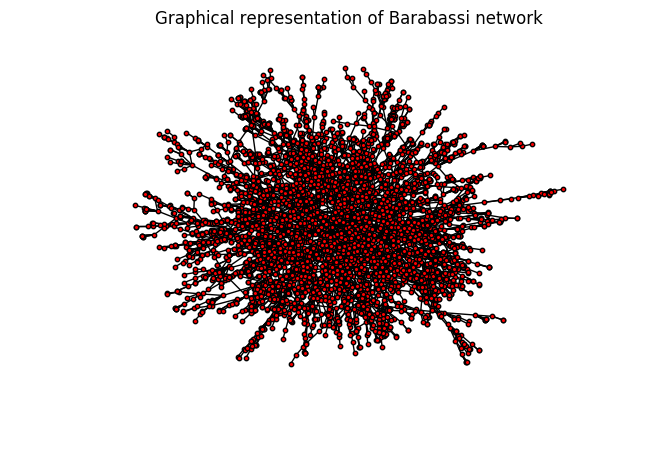

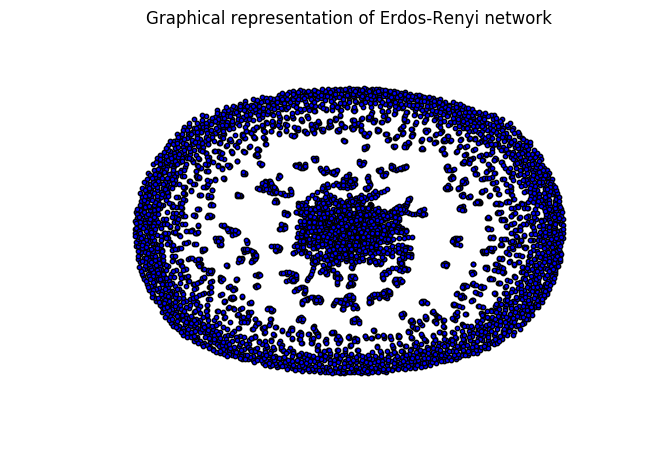

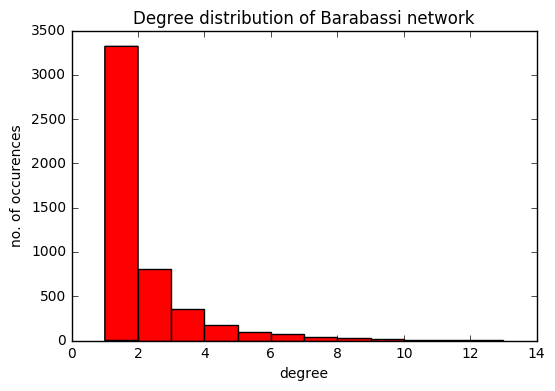

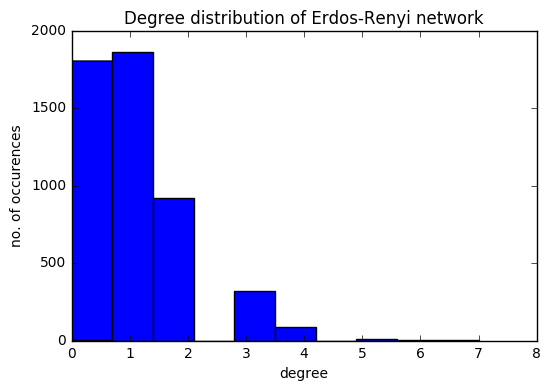

In [162]:
N=5000

# K from BA network which was made before 
k = float(sum(G.degree().values()) / len(G.nodes()))

# ro calculations
ro = k / (N-1)

#Erdos-Renyi with equal N and ro
G_Erdos_Renyi = nx.erdos_renyi_graph(N, ro)

nx.draw(G, node_color = "red", node_size = 10 )
plt.title("Graphical representation of Barabassi network")
plt.show()

nx.draw(G_Erdos_Renyi, node_color = "blue", node_size = 10 )
plt.title("Graphical representation of Erdos-Renyi network")
plt.show()

# Plot histogram for both network to look at de degree distribution and study the number of connected components
Bind=[1,2,3,4,5,6,7,8,9,10,11,12,13]



plt.xlabel("degree")
plt.ylabel("no. of occurences")
plt.title("Degree distribution of Barabassi network")
plt.hist(G.degree().values(),Bind, color="red")
plt.show()

plt.xlabel("degree")
plt.ylabel("no. of occurences")
plt.title("Degree distribution of Erdos-Renyi network")
plt.hist(G_Erdos_Renyi.degree().values(), color="blue")
plt.show()

In Barabassi all nodes are connected, there are no nodes which are of degree equals 0. In the Erdos-Renyi there are a lot of nodes that are not connected to anything - they are away from main cluster. Degree distribution range is also different: 1 to 13 in Barabassi and 0-7 in Erdos-Renyi.

# Part Two: The Wikipedia Philosopher's network

This exercise assumes that you have downloaded and created the directed network of philosophers on Wikipedia, based on the six branches of philosophy on you own. 

## Basic stats

First put together an overview of the 7 lists you created as part of lecture 4. 

* Let's put together some descriptive statistics:
  * How many philosophers in each list? How many total?
  * Which is the largest branch of philosophy? (according to number of Wikipedia philosopher-pages)


In [145]:
import io
import re

branches_of_phi = ['aestheticians', 'epistemologists',
                   'ethicists', 'logicians', 'metaphysicians',
                   'social_and_political_philosophers']

total_phi = 0
num_in_phi = []
for phi in branches_of_phi:
    f = io.open('./wikitext_' + phi + '.txt', 'r', encoding='utf8')
    branch_of_phi = re.findall(r'\[\[(.*?)\]\]', f.read())
    print(phi + ': ' + str(len(branch_of_phi)))
    num_in_phi.append(len(branch_of_phi))
    total_phi = total_phi + len(branch_of_phi)

print('Total: ' + str(total_phi))

largest_branch = max(xrange(len(num_in_phi)), key = lambda x: num_in_phi[x])
print('Largest branch: ' + branches_of_phi[largest_branch])

aestheticians: 126
epistemologists: 99
ethicists: 272
logicians: 273
metaphysicians: 96
social_and_political_philosophers: 295
Total: 1161
Largest branch: social_and_political_philosophers


  * Which philosopher is in most lists & and how many?
  

In [146]:
all_phi = []
for phi in branches_of_phi:
    f = io.open('./wikitext_' + phi + '.txt', 'r', encoding='utf8')
    branch_of_phi = re.findall(r'\[\[(.*?)\]\]', f.read())
    all_phi = all_phi + branch_of_phi

phi_duplicates = set([x for x in all_phi if all_phi.count(x) > 1])


# Find how often philosophers appear in the combined list
# and create a list how often they appear
all_phi_num = []
for i in all_phi:
    all_phi_num.append(all_phi.count(i))

# Find philosopher(s) who is/are in most lists by using
# the max-value of the prev. list and create a new list
find_most_phi = []
for i in range(len(all_phi_num)):
    if (all_phi_num[i] == max(all_phi_num)):
        find_most_phi.append(all_phi[i])

# Deleting duplicates from prev. list and sort
most_phi = sorted(set(find_most_phi))      

# Printing out the most philosopher(s)
for phi in most_phi:
    print(phi + ' is in ' + str(max(all_phi_num)) + ' lists')

Aristotle is in 6 lists
Thomas Aquinas is in 6 lists


* Let's investigate philosophers active in multiple sub-fields in more detail. 
     - Create a list of every philosopher that occurs in more than one list. 
     - Use Python to sort the list according to how many lists each philosopher belongs to (so the guy you found in the previous question is first in that list).
     - Print the top 5 guys and their list counts. Have you heard of any of them?

In [147]:
# Combining two lists (all_phi_num and all_phi) into one list
if (len(all_phi) == len(all_phi_num)):
    all_phi_two = zip(all_phi, all_phi_num)
else:
    print('Lists are not of the same length')

# Deleting duplicates from prev. list
more_phi = set(all_phi_two)

# Sort the list according to how often the philosophers appear
sorted_by_num = sorted(more_phi, key=lambda tup: tup[1], reverse=True)

# Printing out philosophers that appear in more than one list (First 5 of them)
for phi_two in sorted_by_num[:5]:
    if (phi_two[1] > 1):
            print(phi_two[0] + ' is in ' + str(phi_two[1]) + ' lists')

Aristotle is in 6 lists
Thomas Aquinas is in 6 lists
Bertrand Russell is in 5 lists
Plato is in 5 lists
Immanuel Kant is in 5 lists


We have heard of all of the philosophers listed above except Bertrand Russell.

Aristotle the great Greek philosopher known for writing on many topics including physics, poetry, logic or politics. His writing are considered to be fundamental pillar of Western philosophy.

Saint Thomas Aquinas was a theologist and a philosopher. He is known for for his works on importance of reason which he regarded independent on faith as well as many different writings on various issues.

Plato is considered as one of the greatest philosophers that ever lived. He is also considered as one of the founders of Western science and philosophy.

Immanuel Kant, German thinker of the Enlightenment era became known for his works on theory of knowledge, which had a great influence on later philosophers. He also contributed to the modern science as he wanted it to more empirical rather then theological.


## Degree distributions

* Why do you think we want to use a directed graph? Could have we used an undirected graph instead?


The reason for that is that it matters if page A links to page B, or page B links to page A or both link to each other. If we use undirected graphs we cannot tell that difference. If many philosophers link to on philosopher, he then must be important in some way and directed graphs illustrate that. 

* What is the total number of nodes in the network? What is the total number of links? What's the average degree? What's the median degree?


In [148]:
import networkx as nx

P = nx.DiGraph()

# Go through list of philosophers and add notes to P for every philosopher
for pp in range(len(sorted_by_num)):
    P.add_node(sorted_by_num[pp][0])
    
# Go through list of philosophers and find links
for pp in range(len(sorted_by_num)): 
    # Whitespace changed to underscore
    namePhi_url = re.sub('\s+', '_', sorted_by_num[pp][0])
    
    f = io.open('./philosophers_json/' + namePhi_url + '.json', 'r', encoding='utf8')
    phi_link = re.findall(r'\[\[(.*?)\]\]', f.read())
    
    # Add directed link from philosopher A to philosopher B 
    for ppp in range(len(sorted_by_num)):
        if (sorted_by_num[ppp][0] in phi_link):
            P.add_edge(sorted_by_num[pp][0], sorted_by_num[ppp][0])
            #print(sorted_by_num[pp][0] + ' links to ' + sorted_by_num[ppp][0])

In [149]:
import numpy

# Number of nodes in P
numOfNodes = P.number_of_nodes()
print('Number of nodes in P: ' + str(numOfNodes))

# Number of links in P
numOfLinks = P.number_of_edges()
print('Number of links in P: ' + str(numOfLinks))

# Average degree of P
avgDegree = float(numOfLinks) / float(numOfNodes)
print('Average degree of P: ' + str(avgDegree))

# Median degree of P
nodesDegrees = []
for i in range(len(sorted_by_num)):
    nodesDegrees.append(P.degree(sorted_by_num[i][0]))
print('Median degree of P: ' + str(numpy.median(nodesDegrees)))

Number of nodes in P: 1015
Number of links in P: 3528
Average degree of P: 3.47586206897
Median degree of P: 3.0


* List the top 10 philosophers by in-degree and out-degree.

In [150]:
# In-degrees and out-degrees of P
inDegrees = []
outDegrees = []
for i in range(len(sorted_by_num)):
    inDegrees.append(P.in_degree(sorted_by_num[i][0]))
    outDegrees.append(P.out_degree(sorted_by_num[i][0]))
    
# Unzip list 'sorted_by_num' to only get the names
names, num = zip(*sorted_by_num)

# Combining three lists (names, in-degrees, out-degrees) into one
InOutDegrees = zip(names, inDegrees, outDegrees)

In [151]:
# Print top 10 in in-degrees and their names
# Sort by in-degrees
inDegreesSort = sorted(InOutDegrees, key=lambda tup: tup[1], reverse=True)

# Getting the first 10 in the list
TopInDegrees = inDegreesSort[0:10]

for i in TopInDegrees:
    print(i[0] + ' has ' + str(i[1]) + ' in-degrees')

Aristotle has 116 in-degrees
Plato has 87 in-degrees
Bertrand Russell has 78 in-degrees
Immanuel Kant has 77 in-degrees
Karl Marx has 60 in-degrees
Ludwig Wittgenstein has 53 in-degrees
David Hume has 49 in-degrees
John Stuart Mill has 47 in-degrees
Friedrich Nietzsche has 44 in-degrees
John Locke has 39 in-degrees


In [152]:
# Print top 10 in out-degrees and their names
# Sort by out-degrees
outDegreesSort = sorted(InOutDegrees, key=lambda tup: tup[2], reverse=True)

# Getting the first 10 in the list
TopOutDegrees = outDegreesSort[0:10]

for i in TopOutDegrees:
    print(i[0] + ' has ' + str(i[2]) + ' out-degrees')

Bertrand Russell has 38 out-degrees
Martin Heidegger has 35 out-degrees
Georg Wilhelm Friedrich Hegel has 34 out-degrees
David Hume has 32 out-degrees
Friedrich Nietzsche has 29 out-degrees
Ludwig Wittgenstein has 27 out-degrees
Michel Foucault has 27 out-degrees
Plato has 26 out-degrees
Søren Kierkegaard has 26 out-degrees
Alfred North Whitehead has 26 out-degrees


* What is the interpretation of in-degree and out-degree in this case? Have you heard about these philosophers before?

The philosophers who have the most in-degrees are simply the oldest. Philosophers are basing their work on their previous work. Aristotle and Plato are at the top, as they were among the first philosophers.

The philosophers that have the most out-degrees are influenced by many philosophers or are collaborating with many.

We have heard about: Aristotle, Plato, Karl Marx, Friedrich Nietzsche and John Locke.

* Plot the distribution of in-degrees and out-degrees, binned using (for example) numpy.histogram. What is the most common degree?

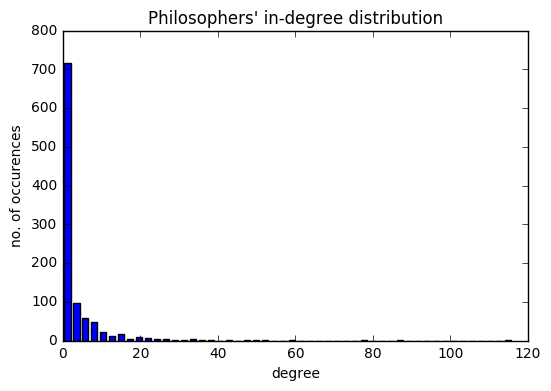

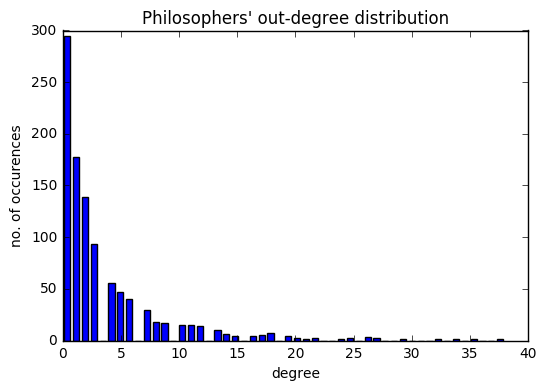

In [153]:
# in-degrees distribution
in_hist, in_bins = numpy.histogram(P.in_degree().values(), bins=50)
width = 0.7 * (in_bins[1] - in_bins[0])
center = (in_bins[:-1] + in_bins[1:]) / 2
plt.bar(center, in_hist, align='center', width=width)
plt.xlabel("degree")
plt.ylabel("no. of occurences")
plt.title("Philosophers' in-degree distribution")
plt.show()

# out-degrees distribution
out_hist, out_bins = numpy.histogram(P.out_degree().values(), bins=50)
width = 0.7 * (out_bins[1] - out_bins[0])
center = (out_bins[:-1] + out_bins[1:]) / 2
plt.bar(center, out_hist, align='center', width=width)
plt.xlabel("degree")
plt.ylabel("no. of occurences")
plt.title("Philosophers' out-degree distribution")
plt.show()

The most common degree is zero. Many philosophers' Wikipedia pages are not linking to another philosophers' Wikipedia pages.

* Plot the distribution of in-degrees and out-degrees one more time, this time plotted loglog scale.

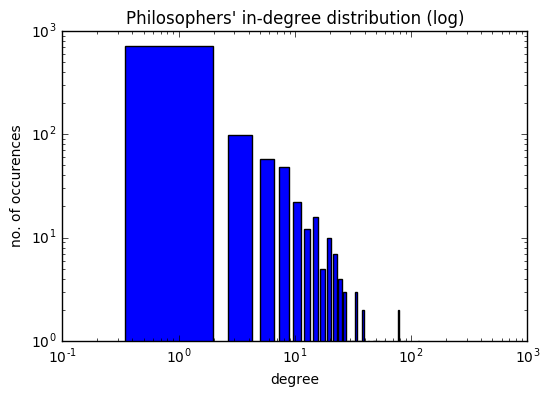

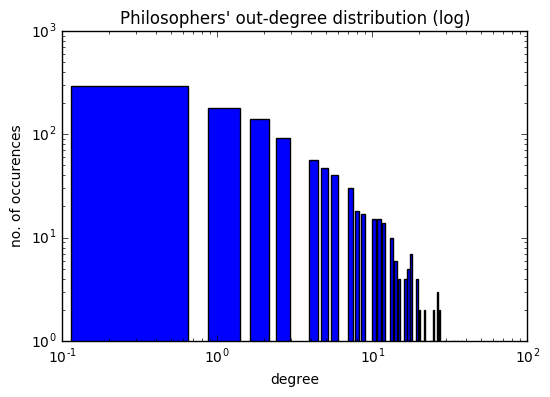

In [154]:
# in-degrees distribution (log)
hist, bins = numpy.histogram(P.in_degree().values(), bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.xlabel("degree")
plt.ylabel("no. of occurences")
plt.title("Philosophers' in-degree distribution (log)")
plt.show()

# out-degrees distribution (log)
hist, bins = numpy.histogram(P.out_degree().values(), bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.xlabel("degree")
plt.ylabel("no. of occurences")
plt.title("Philosophers' out-degree distribution (log)")
plt.show()

* Describe the distributions (as you would in a well written figure caption). Do they look Poissonian? Power-law? Something in between?

This looks similar to the power-law distribution. Altough the following bins are not exactly powers of preceding bins the sahpe of the distribution is comparable to shape of ideal power-law sidtribution. It may be also well observed that there is a long tail (in a not loglog graph) which follows the power-law distribution relationhip between points.

* Plot a scatter plot of the the in- versus out- degree for all philosophers using a loglog scale.

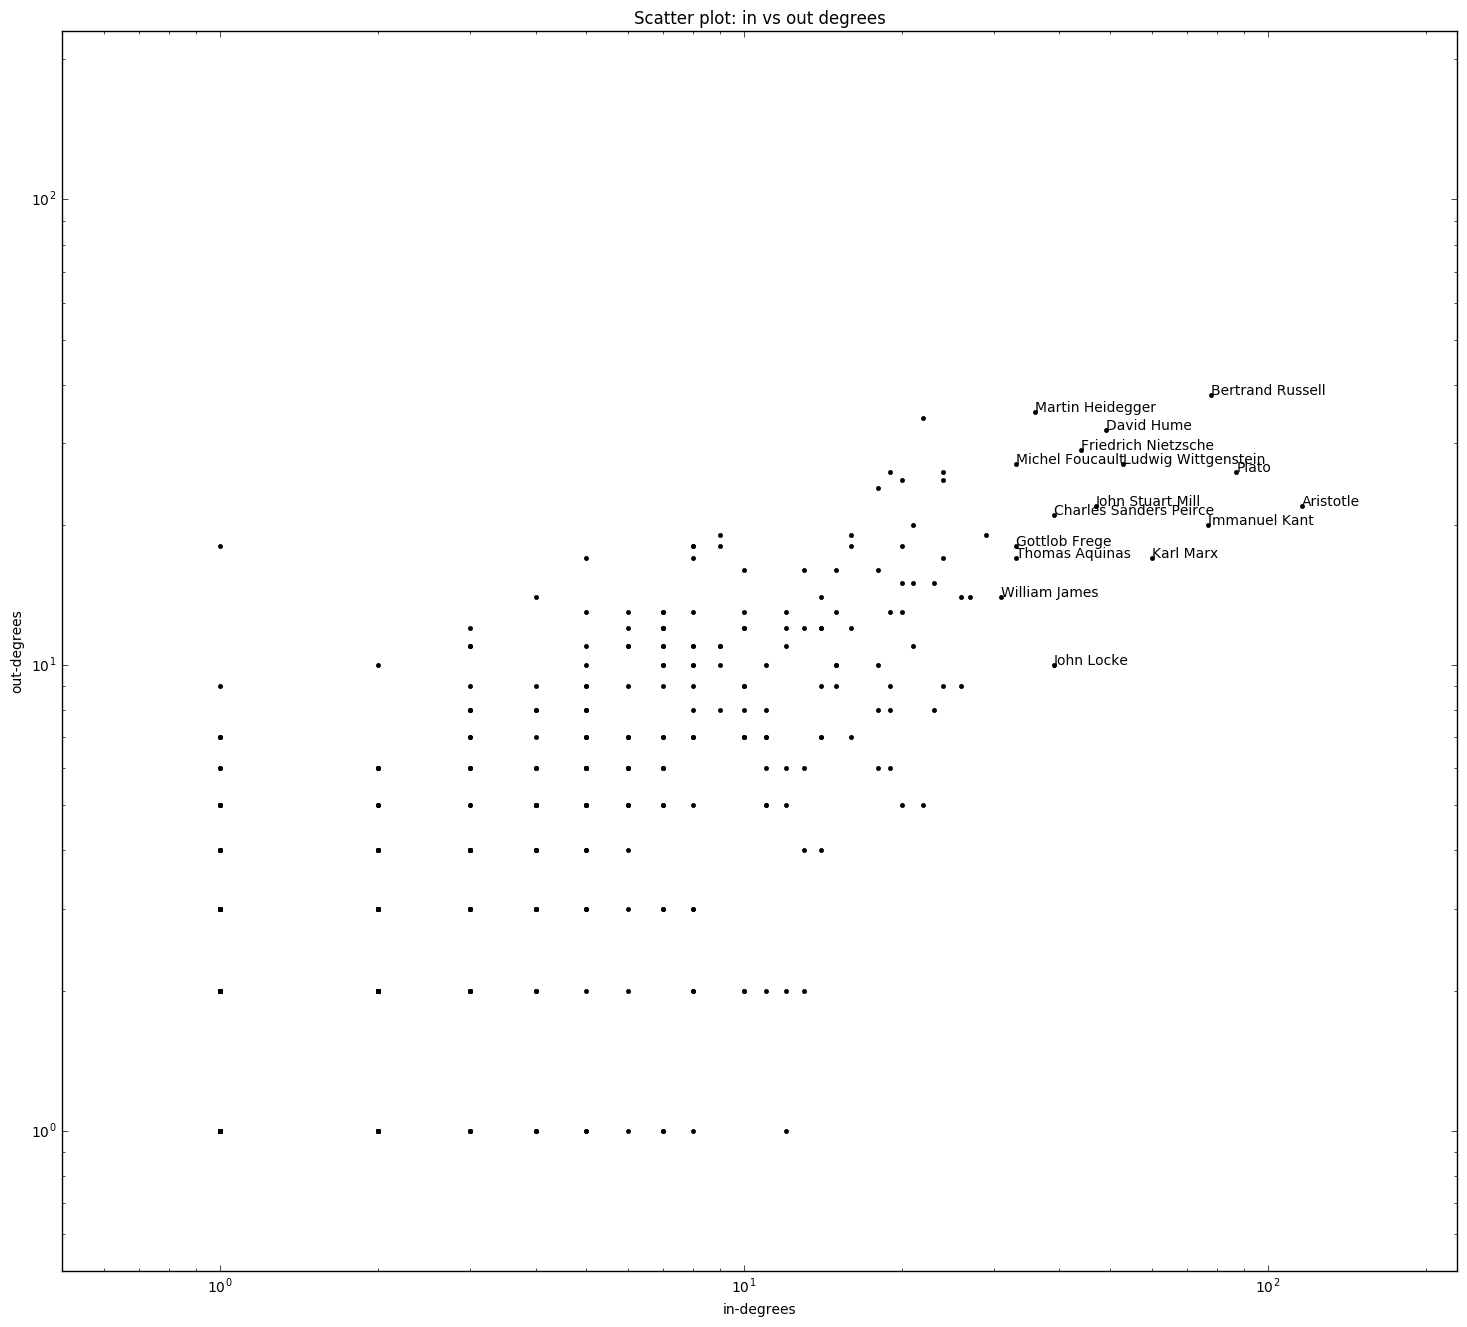

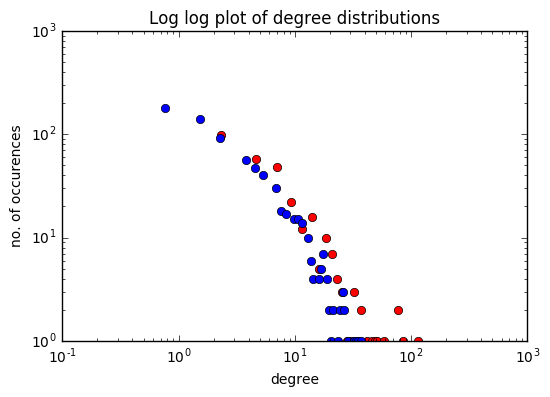

In [155]:
# Unzip list 'InOutDegrees'
nodes, inD, outD = zip(*InOutDegrees)

z = inD # in-degrees
y = outD # out-degrees
n = nodes
fig=plt.figure(figsize=(18, 16), dpi= 80)
# Scatter plot - normal
# fig, ax = plt.subplots()
# ax.scatter(z, y)

plt.loglog(z,y,".k")
plt.xlim(0.5,230)
plt.ylim(0.5,230)

for i, txt in enumerate(n):
    # Only show names of those who have more than 20 in- and out-degrees
    if ((z[i] or y[i]) >= 30):
        plt.annotate(txt, (z[i], y[i]))

plt.title("Scatter plot: in vs out degrees - log log")
plt.xlabel('in-degrees')
plt.ylabel('out-degrees')
plt.show()

# Scatter plot - log
# fig, ax = plt.subplots()
# ax.scatter(z, y)

# for i, txt in enumerate(n):
#     ax.annotate(txt, (z[i], y[i]))

# plt.gca().set_xscale('log')
# plt.gca().set_yscale('log')
# plt.xlabel('in-degrees (log)')
# plt.ylabel('out-degrees (log)')
# plt.show()

plt.loglog(in_bins[0:len(in_bins)-1],in_hist,'ro')
plt.loglog(out_bins[0:len(out_bins)-1],out_hist,'o')

plt.title("Log log plot of degree distributions")
plt.xlabel("degree")
plt.ylabel("no. of occurences")

plt.show()


* Comment on the relation between the two. Do any particular philosophers stand out?

We can observe that the in and out degree distributions follow similar curve. We can say that there are only a few philosophers that had both high in and out degrees which may indicate that they were most influential ones. As compared to the first graph the names on it tells us which were the most influential philosphers.